<a href="https://colab.research.google.com/github/juasalazarmo/Se-ales_Sistemas/blob/main/SimulacionFeb13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Función de transferencia obtenida:


1/k

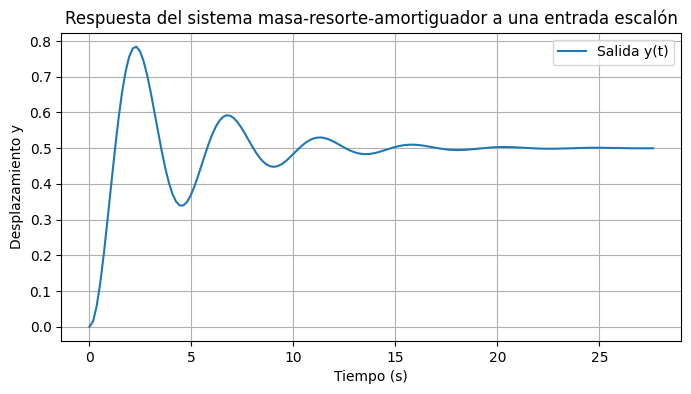

In [3]:
!pip install control
import sympy as sp
import control as ctl
import matplotlib.pyplot as plt

# Definir variables simbólicas
t, s = sp.symbols('t s')
Y, F_E = sp.Function('Y')(s), sp.Function('F_E')(s)
m, c, k = sp.symbols('m c k', positive=True)

# Definir la ecuación de movimiento en el dominio del tiempo
Eq = sp.Eq(m * sp.diff(Y, s, s) + c * sp.diff(Y, s) + k * Y, F_E)

# Transformar la ecuación a Laplace (condiciones iniciales nulas)
Y_s, F_E_s = sp.symbols('Y_s F_E_s')
Eq_Laplace = Eq.subs({Y: Y_s, F_E: F_E_s})

# Despejar Y_s en términos de F_E_s
Y_s_solution = sp.solve(Eq_Laplace, Y_s)[0]
G_s = sp.simplify(Y_s_solution / F_E_s)

print("Función de transferencia obtenida:")
display(G_s)

# Implementación en control para simulaciones
# Assign numerical values to m, c, and k
m_val = 1.0  # Example value for mass
c_val = 0.5  # Example value for damping coefficient
k_val = 2.0  # Example value for spring constant

num = [1]
den = [m_val, c_val, k_val]  # Use numerical values for den

G = ctl.TransferFunction(num, den)

# Respuesta a una entrada escalón
time, response = ctl.step_response(G)

# Graficar la respuesta
title = "Respuesta del sistema masa-resorte-amortiguador a una entrada escalón"
plt.figure(figsize=(8, 4))
plt.plot(time, response, label='Salida y(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento y')
plt.title(title)
plt.grid()
plt.legend()
plt.show()

Función de transferencia obtenida:


1/k

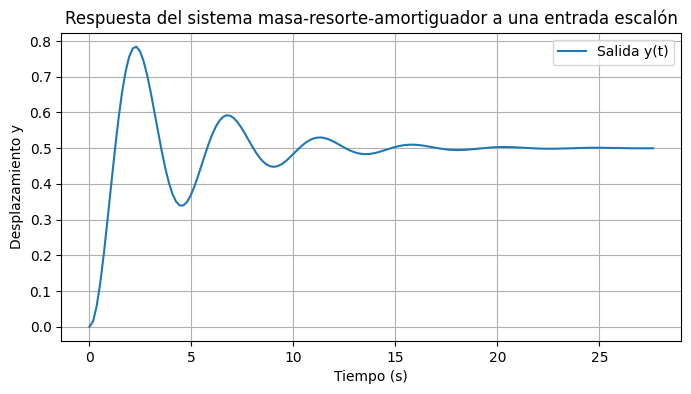

Función de transferencia del circuito eléctrico equivalente:


R/(C*L*R*s**2 + L*s + R)

In [6]:
import sympy as sp
import control as ctl
import matplotlib.pyplot as plt

# Definir variables simbólicas
t, s = sp.symbols('t s')
Y, F_E = sp.Function('Y')(s), sp.Function('F_E')(s)
m, c, k = sp.symbols('m c k', positive=True)

# Definir la ecuación de movimiento en el dominio del tiempo
Eq = sp.Eq(m * sp.diff(Y, s, s) + c * sp.diff(Y, s) + k * Y, F_E)

# Transformar la ecuación a Laplace (condiciones iniciales nulas)
Y_s, F_E_s = sp.symbols('Y_s F_E_s')
Eq_Laplace = Eq.subs({Y: Y_s, F_E: F_E_s})

# Despejar Y_s en términos de F_E_s
Y_s_solution = sp.solve(Eq_Laplace, Y_s)[0]
G_s = sp.simplify(Y_s_solution / F_E_s)

print("Función de transferencia obtenida:")
display(G_s)

# Implementación en control para simulaciones
num = [1]
# Assign numerical values to m, c, and k
m_val = 1.0  # Example value for mass
c_val = 0.5  # Example value for damping coefficient
k_val = 2.0  # Example value for spring constant

den = [m_val, c_val, k_val]  # Use numerical values for den
G = ctl.TransferFunction(num, den)

# Respuesta a una entrada escalón
time, response = ctl.step_response(G)

# Graficar la respuesta
title = "Respuesta del sistema masa-resorte-amortiguador a una entrada escalón"
plt.figure(figsize=(8, 4))
plt.plot(time, response, label='Salida y(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento y')
plt.title(title)
plt.grid()
plt.legend()
plt.show()

# Sistema eléctrico equivalente
L, C, R = sp.symbols('L C R', positive=True)
V_i, V_o = sp.Function('V_i')(s), sp.Function('V_o')(s)

# Ecuación del circuito RLC paralelo
Eq_elec = sp.Eq((s**2 + (1/(R*C))*s + (1/(L*C)))*V_o, (1/(L*C))*V_i)

# Despejar función de transferencia
V_o_solution = sp.solve(Eq_elec, V_o)[0]
H_s = sp.simplify(V_o_solution / V_i)

print("Función de transferencia del circuito eléctrico equivalente:")
display(H_s)


Factor de amortiguamiento: 0.3162
Frecuencia natural no amortiguada: 3.1623 rad/s
Frecuencia natural amortiguada: 3.0000 rad/s
Tiempo pico: 1.0472 s
Tiempo de levantamiento: 0.5692 s
Tiempo de establecimiento: 4.0000 s


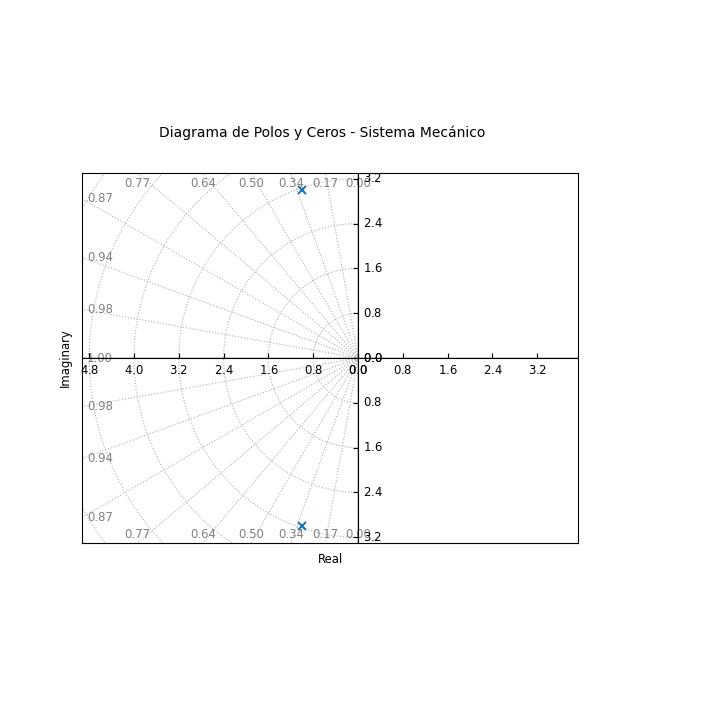

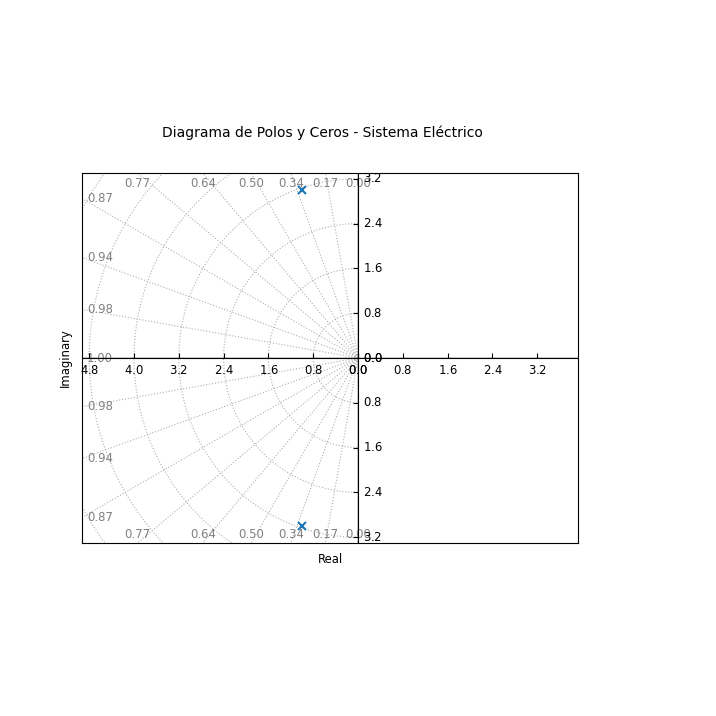

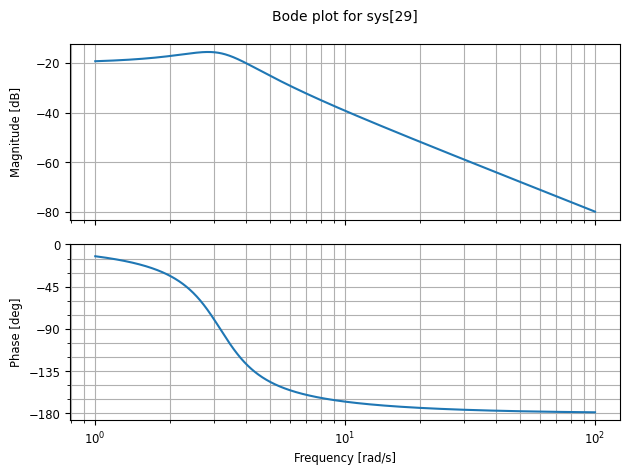

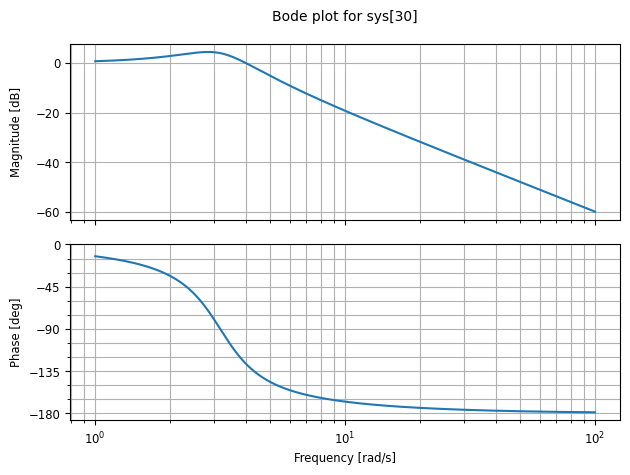

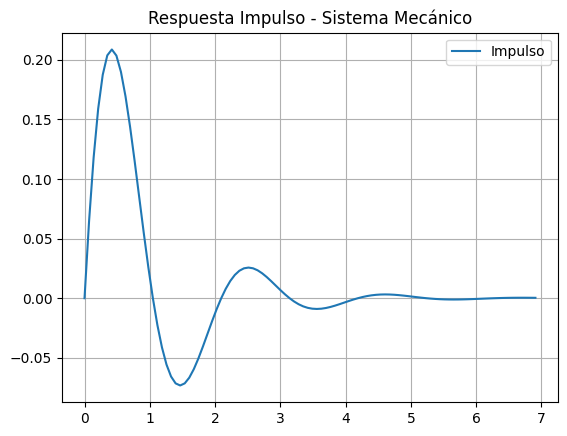

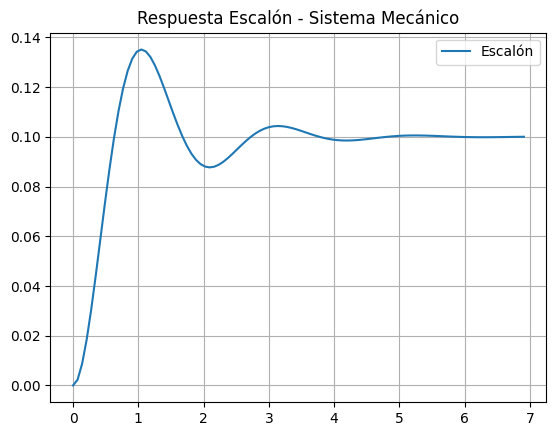

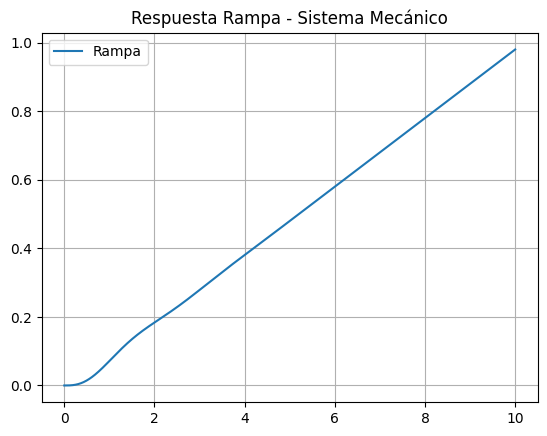

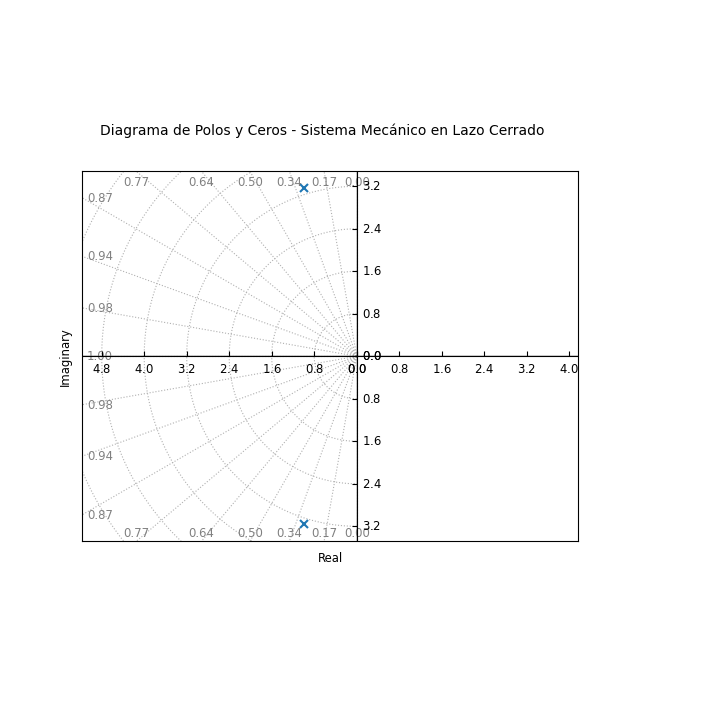

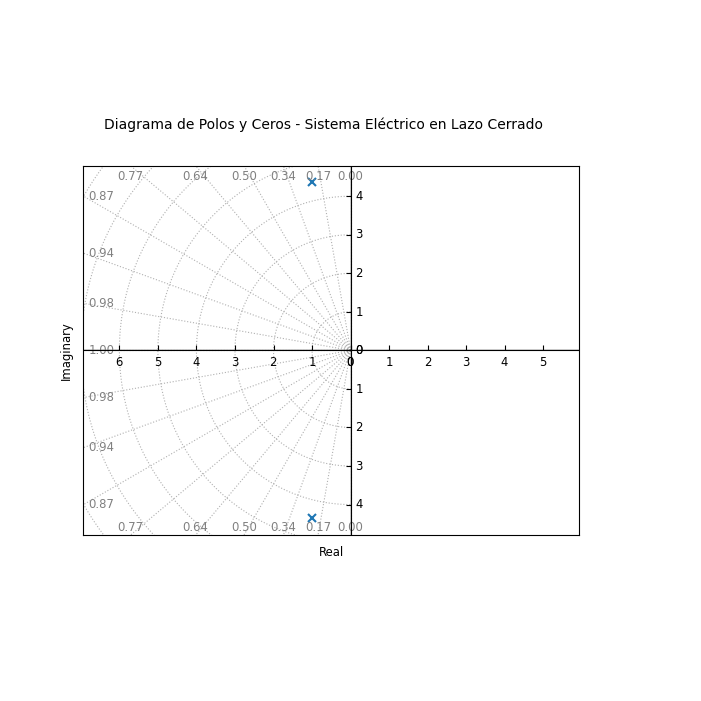

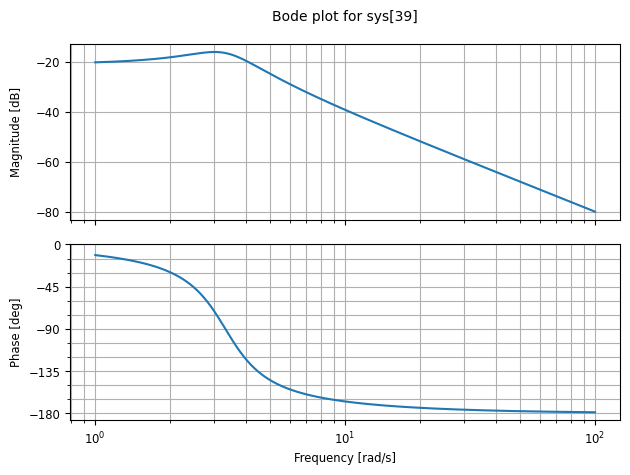

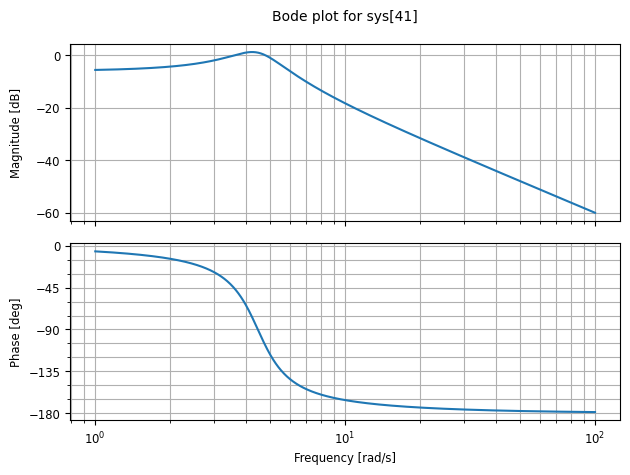

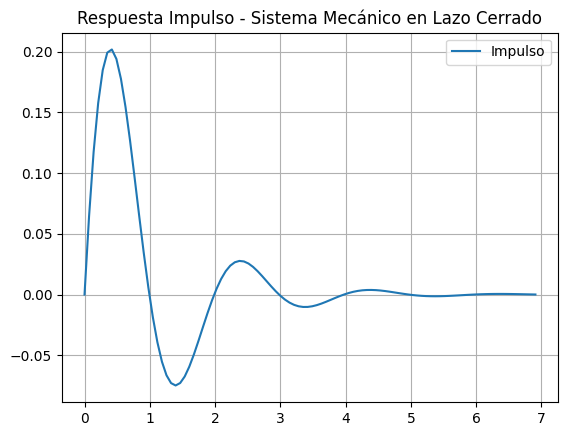

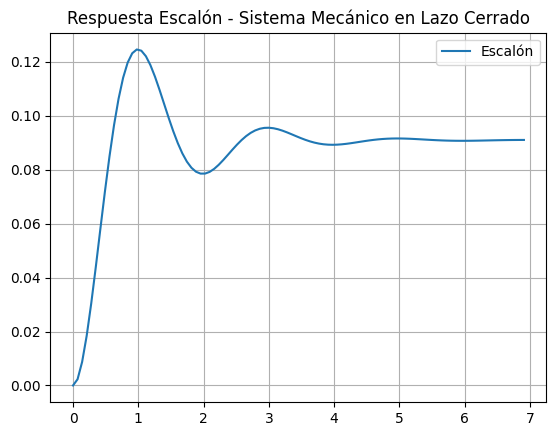

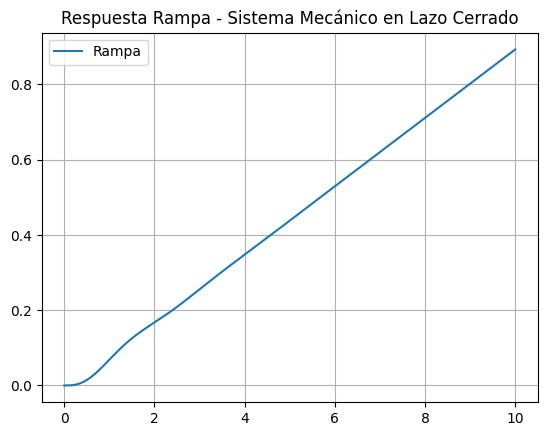

In [8]:
import sympy as sp
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Definir valores numéricos para el sistema subamortiguado
m_val, k_val, c_val = 1.0, 10.0, 2.0  # Masa (kg), constante del resorte (N/m), amortiguamiento (Ns/m)
L_val, C_val, R_val = 1.0, 0.1, 5.0  # Inductancia (H), capacitancia (F), resistencia (Ohm)

# Calcular parámetros del sistema mecánico
wn = np.sqrt(k_val / m_val)  # Frecuencia natural no amortiguada
zeta = c_val / (2 * np.sqrt(m_val * k_val))  # Factor de amortiguamiento
wd = wn * np.sqrt(1 - zeta**2)  # Frecuencia natural amortiguada

# Calcular tiempos característicos
time_peak = np.pi / wd  # Tiempo pico
time_rise = (1.8 / wn)  # Tiempo de levantamiento aproximado
time_settle = (4 / (zeta * wn))  # Tiempo de establecimiento

print(f"Factor de amortiguamiento: {zeta:.4f}")
print(f"Frecuencia natural no amortiguada: {wn:.4f} rad/s")
print(f"Frecuencia natural amortiguada: {wd:.4f} rad/s")
print(f"Tiempo pico: {time_peak:.4f} s")
print(f"Tiempo de levantamiento: {time_rise:.4f} s")
print(f"Tiempo de establecimiento: {time_settle:.4f} s")

# Definir función de transferencia sistema mecánico
num_mech = [1]
den_mech = [m_val, c_val, k_val]
G_mech = ctl.TransferFunction(num_mech, den_mech)

# Definir función de transferencia sistema eléctrico
num_elec = [1 / (L_val * C_val)]
den_elec = [1, 1 / (R_val * C_val), 1 / (L_val * C_val)]
G_elec = ctl.TransferFunction(num_elec, den_elec)

# Gráficas de polos y ceros
plt.figure()
ctl.pzmap(G_mech, title='Diagrama de Polos y Ceros - Sistema Mecánico', grid=True)
plt.figure()
ctl.pzmap(G_elec, title='Diagrama de Polos y Ceros - Sistema Eléctrico', grid=True)

# Diagramas de Bode
plt.figure()
ctl.bode(G_mech, dB=True)
plt.figure()
ctl.bode(G_elec, dB=True)

# Respuestas impulso, escalón y rampa
plt.figure()
time, response = ctl.impulse_response(G_mech)
plt.plot(time, response, label='Impulso')
plt.title('Respuesta Impulso - Sistema Mecánico')
plt.grid()
plt.legend()

plt.figure()
time, response = ctl.step_response(G_mech)
plt.plot(time, response, label='Escalón')
plt.title('Respuesta Escalón - Sistema Mecánico')
plt.grid()
plt.legend()

plt.figure()
time = np.linspace(0, 10, 1000)
_, response = ctl.forced_response(G_mech, time, time)
plt.plot(time, response, label='Rampa')
plt.title('Respuesta Rampa - Sistema Mecánico')
plt.grid()
plt.legend()

# Sistema en lazo cerrado
G_mech_closed = ctl.feedback(G_mech, 1)
G_elec_closed = ctl.feedback(G_elec, 1)

plt.figure()
ctl.pzmap(G_mech_closed, title='Diagrama de Polos y Ceros - Sistema Mecánico en Lazo Cerrado', grid=True)
plt.figure()
ctl.pzmap(G_elec_closed, title='Diagrama de Polos y Ceros - Sistema Eléctrico en Lazo Cerrado', grid=True)

plt.figure()
ctl.bode(G_mech_closed, dB=True)
plt.figure()
ctl.bode(G_elec_closed, dB=True)

plt.figure()
time, response = ctl.impulse_response(G_mech_closed)
plt.plot(time, response, label='Impulso')
plt.title('Respuesta Impulso - Sistema Mecánico en Lazo Cerrado')
plt.grid()
plt.legend()

plt.figure()
time, response = ctl.step_response(G_mech_closed)
plt.plot(time, response, label='Escalón')
plt.title('Respuesta Escalón - Sistema Mecánico en Lazo Cerrado')
plt.grid()
plt.legend()

plt.figure()
time = np.linspace(0, 10, 1000)
_, response = ctl.forced_response(G_mech_closed, time, time)
plt.plot(time, response, label='Rampa')
plt.title('Respuesta Rampa - Sistema Mecánico en Lazo Cerrado')
plt.grid()
plt.legend()

plt.show()
